<a href="https://colab.research.google.com/github/cristianopoeta/DSWP/blob/master/Notebooks/2020-10-13%20NB10_01__Pandas%20-%20exerc%C3%ADcio%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 9
O arquivo FIFA.csv contem dados relacionados à última edição do FIFA 2018 (um dos jogos de video-game mais famosos) e traz os mais variados dados sobre os jogadores (exemplo): idade, nacionalidade, potencial, salário e etc. Faça o seguinte:

1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);
2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
3. Qual o dtype de cada variável/atributo do dataframe?
4. Se alguma variávável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?
5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;
6. Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?
7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');
9. Qual a número de jogadores por idade?
10. Quantos jogadores possuem cada clube?
11. Qual a média de idade por clube?
12. Qual a média de salário por país?
13. Qual a média de salário por clube?
14. Qual a média de salário por idade?
15. Quanto cada clube gasta com pagamento de salários?
16. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?
17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
22. Quem são os outliers em termos de salário?
23. Quem são os outliers em termos de potência no chute?

### Definições iniciais

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [ ]:
pdod = pd.options.display    # atalho para opções de exibição
pdod.max_rows = 100          # qtd máx de linhas exibidas
pdod.max_columns = 100       # qtd máx de colunas exibidas
pdod.width = 200             # larg máx total em modo texto

In [ ]:
# retorna para cada coluna de `frame`: nome da coluna, valor de exemplo, 
#     dtype da coluna, classe do valor de exemplo
# valor de exemplo é tomado na linha de `frame` indicada por `iloc`
def exemplo_linha(frame, iloc=0):
  df_info = pd.DataFrame(dict(valor_exemplo=frame.iloc[iloc].copy()))
  df_info['dtype_coluna'] = frame.dtypes.map(lambda x: x.name)
  df_info['classe_valor'] = df_info['valor_exemplo'].map(lambda x: x.__class__.__name__)
  df_info.index.name = 'nome_coluna'
  return df_info

In [ ]:
# `obj` pode ser DataFrame ou Series.
# se `filtros` for `None`, exibe primeiras `nh` posições, últimas `nt` posições 
#     e `shape` de `obj`.
# se `filtros` não for `None`, deve ser um iterável com elemntos que possam ser 
#     utilizados em `obj.loc[]` (funções de filtragem são uma boa opção).
def d_pd(obj, nh=1, nt=None, filtros=None):
    if nt is None:
        nt = nh
    if filtros is None:
        display(pd.concat([obj.head(nh), obj.tail(nt)]), obj.shape)
    else:
        for filtro in filtros:
            display(obj.loc[filtro])
        display(obj.shape)

### Importação do dataset e alterações e verificações iniciais

In [ ]:
# importação do dataset
df_fifa = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/FIFA.csv')
d_pd(df_fifa)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


(18207, 89)

In [ ]:
# redefinição dos nomes de colunas
# de camel case para snake case
df_fifa.columns = (df_fifa.columns
                   .str.replace(' ', '_')
                   .str.replace('(?<=[a-z])(?=[A-Z])', '_')
                   .str.replace('^([A-Z]+)([A-Z])(?=[a-z])', r'\1_\2')
                   .str.lower())
df_fifa.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'photo', 'nationality', 'flag', 'overall', 'potential', 'club', 'club_logo', 'value', 'wage', 'special', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'position', 'jersey_number', 'joined', 'loaned_from', 'contract_valid_until', 'height', 'weight', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kickin

In [ ]:
# eliminação de colunas e definição do índice de linhas
lst_cols_keep = ['id', 'name', 'age', 'nationality', 'overall', 'potential', 
    'club', 'value', 'wage', 'release_clause', 'special', 'preferred_foot', 
    'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 
    'position', 'jersey_number', 'joined', 'loaned_from', 
    'contract_valid_until', 'height', 'weight', 'crossing', 'finishing', 
    'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 
    'fk_accuracy', 'long_passing', 'ball_control', 'acceleration', 
    'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 
    'positioning', 'vision', 'penalties', 'composure', 'marking', 
    'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 
    'gk_kicking', 'gk_positioning', 'gk_reflexes']
col_indice = 'id'
df_fifa = df_fifa[lst_cols_keep].set_index(col_indice)
d_pd(df_fifa)

,name,age,nationality,overall,potential,club,value,wage,release_clause,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,€226.5M,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
246269,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,€165K,1321,Right,1.0,3.0,2.0,Medium/ Medium,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0


(18207, 56)

In [ ]:
# inspeção das colunas e dos valores das linhas inicial e final
display(Markdown('### iloc = 0'), exemplo_linha(df_fifa, iloc=0).T, 
        Markdown('<br/>\n\n### iloc = -1'), exemplo_linha(df_fifa, iloc=-1).T)

### iloc = 0

nome_coluna,name,age,nationality,overall,potential,club,value,wage,release_clause,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
valor_exemplo,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,€226.5M,2202,Left,5,4,4,Medium/ Medium,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
dtype_coluna,object,int64,object,int64,int64,object,object,object,object,int64,object,float64,float64,float64,object,object,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
classe_valor,str,int64,str,int64,int64,str,str,str,str,int64,str,float64,float64,float64,str,str,float64,str,float,str,str,str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


<br/>

### iloc = -1

nome_coluna,name,age,nationality,overall,potential,club,value,wage,release_clause,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
valor_exemplo,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,€165K,1321,Right,1,3,2,Medium/ Medium,CM,33,"Oct 30, 2018",NaN,2019,5'10,176lbs,41,34,46,48,30,43,40,34,44,51,57,55,55,51,63,43,62,47,60,32,56,42,34,49,33,43,40,43,50,10,15,9,12,9
dtype_coluna,object,int64,object,int64,int64,object,object,object,object,int64,object,float64,float64,float64,object,object,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
classe_valor,str,int64,str,int64,int64,str,str,str,str,int64,str,float64,float64,float64,str,str,float64,str,float,str,str,str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


### Alterações nas colunas com valores financeiros

In [ ]:
# com base na linha inicial, identificação de colunas com valores financeiros
sr_linha_0 = df_fifa.iloc[0]
lst_cols_financ = ( sr_linha_0[ sr_linha_0.str.contains('€', na=False) ]
                    .index.to_list() )
lst_cols_financ

['value', 'wage', 'release_clause']

In [ ]:
# desdobramento das colunas de valores financeiros com expressão regular.
# cada coluna vira 3 colunas de texto: moeda, quantidade, multiplicador.
df_financ = pd.concat(
     [  df_fifa[col].str.extract(r'^(\D+)([\d\.]+)(\D+)$')
        .set_axis(
            labels=[f'{col}_{obs}' for obs in  ('moeda', 'quant', 'multi')]
            , axis=1)
        for col in lst_cols_financ]
    , axis=1)
d_pd(df_financ)

,value_moeda,value_quant,value_multi,wage_moeda,wage_quant,wage_multi,release_clause_moeda,release_clause_quant,release_clause_multi
id,,,,,,,,,
158023,€,110.5,M,€,565,K,€,226.5,M
246269,€,60,K,€,1,K,€,165,K


(18207, 9)

In [ ]:
# levantamento dos valores distintos nas colunas de moeda e de multiplicador
lst_cols_texto = [nome for nome in df_financ.columns if not nome.endswith('quant')]
pd.Series({col:list(df_financ[col].unique()) for col in lst_cols_texto})

value_moeda                [€, nan]
value_multi             [M, nan, K]
wage_moeda                 [€, nan]
wage_multi                 [K, nan]
release_clause_moeda       [€, nan]
release_clause_multi    [M, nan, K]
dtype: object

In [ ]:
# conclusão: todos valores em euros e somente multiplicadores de milhar e milhão.
# atualização das colunas originais dos valores financeiros com valores `float`
# resultantes das quantidades multiplicadas pelos valores de K e M.
lst_cols_quant = [nome for nome in df_financ.columns if nome.endswith('quant')]
lst_cols_multi = [nome for nome in df_financ.columns if nome.endswith('multi')]
display(lst_cols_financ, lst_cols_quant, lst_cols_multi)
df_fifa.loc[:, lst_cols_financ] = (
    df_financ[lst_cols_quant].astype(float).values 
    * 
    df_financ[lst_cols_multi].applymap({'K':1000.0, 'M':1000000.0}.get).values)

['value', 'wage', 'release_clause']

['value_quant', 'wage_quant', 'release_clause_quant']

['value_multi', 'wage_multi', 'release_clause_multi']

In [ ]:
# conferência: `dtypes` das colunas de valores financeiros
display(  df_fifa[lst_cols_financ].dtypes  )
print()
display(  df_fifa[lst_cols_financ].sample(3)  )

value             float64
wage              float64
release_clause    float64
dtype: object

,value,wage,release_clause
id,,,
192231,775000.0,3000.0,1400000.0
235389,500000.0,6000.0,950000.0
244677,70000.0,1000.0,175000.0


In [ ]:
# sumários estatístico e técnico
display(df_fifa[lst_cols_financ].describe())
print()
df_fifa[lst_cols_financ].info(memory_usage=False)

,value,wage,release_clause
count,1.795500e+04,17966.000000,1.664300e+04
mean,2.444530e+06,9861.850161,4.585061e+06
std,5.626715e+06,22117.273534,1.111872e+07
min,1.000000e+04,1000.000000,1.300000e+04
25%,3.250000e+05,1000.000000,5.250000e+05
50%,7.000000e+05,3000.000000,1.100000e+06
75%,2.100000e+06,9000.000000,3.500000e+06
max,1.185000e+08,565000.000000,2.281000e+08



<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   value           17955 non-null  float64
 1   wage            17966 non-null  float64
 2   release_clause  16643 non-null  float64
dtypes: float64(3)

### Alterações nas colunas de medidas corporais

In [ ]:
# inspeção dos formatos utilizados nas medidas
lst_cols_medidas = ['height', 'weight']
re_digito = re.compile(r'\d+')
pd.Series(
    {col:list(df_fifa[col].str.replace(re_digito, '0').unique()) 
    for col in lst_cols_medidas})

height     [0'0, nan]
weight    [0lbs, nan]
dtype: object

In [ ]:
# redefinição da altura com float em metros com duas casas decimais
df_fifa['height'] = (
    df_fifa.height
    .str.split("'", expand=True)
    .astype(float) 
    * np.array([0.3048, 0.0254])
    ).sum(axis=1).round(2)

In [ ]:
# redefinição do peso com float em kg com uma casa decimal
df_fifa['weight'] = (
    df_fifa.weight
    .str.replace('lbs', '', regex=False)
    .astype(float) * 0.45359237
    ).round(1)

In [ ]:
# conferência: `dtypes` das colunas de medidas
display(  df_fifa[lst_cols_medidas].dtypes  )
print()
display(  df_fifa[lst_cols_medidas].sample(3)  )

height    float64
weight    float64
dtype: object

,height,weight
id,,
220915,1.83,74.8
221358,1.78,64.0
193601,1.85,81.2


In [ ]:
# sumários estatístico e técnico das medidas corporais
display(df_fifa[lst_cols_medidas].describe())
print()
df_fifa[lst_cols_medidas].info(memory_usage=False)

,height,weight
count,18207.000000,18159.000000
mean,1.807566,75.274955
std,0.114910,7.071966
min,0.000000,49.900000
25%,1.750000,69.900000
50%,1.800000,74.800000
75%,1.850000,79.800000
max,2.060000,110.200000



<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  18207 non-null  float64
 1   weight  18159 non-null  float64
dtypes: float64(2)

In [ ]:
# verificação altura menor do que 1 metro e alteração para NA
pdod.max_colwidth = None
display(
    df_fifa[df_fifa.height < 1].groupby('height')['name'].agg(list).to_frame() )
pdod.max_colwidth = 50
df_fifa.loc[df_fifa.height < 1, 'height'] = np.nan

,name
height,
0.0,"[J. McNulty, J. Barrera, J. Stead, A. Semprini, R. Bingham, K. Dankowski, I. Colman, M. Feeney, R. Minor, Klauss, I. Sissoko, F. Hart, L. McCullough, Li Yunqiu, F. Garcia, R. Haemhouts, E. Binaku, G. Miller, A. Aidonis, L. Sowah, R. Deacon, Jang Hyun Soo, A. Al Malki, E. Guerrero, Hernáiz, H. Al Mansour, H. Paul, S. Bauer, M. Chergui, D. Gardner, L. Bengtsson, F. Jaramillo, L. Garguła, S. Rivera, Vinicius, F. Sepúlveda, L. Spence, B. Lepistu, A. Abruscia, E. González, M. Al Amri, J. Rebolledo, C. Mamengi, P. Mazzocchi, Y. Ammour, Jwa Joon Hyeop, O. Marrufo, Han Pengfei]"


In [ ]:
# sumários estatístico e técnico da altura após correção de altura zerada
display(df_fifa[['height']].describe())
print()
df_fifa[['height']].info(memory_usage=False)

,height
count,18159.000000
mean,1.812344
std,0.067672
min,1.550000
25%,1.750000
50%,1.800000
75%,1.850000
max,2.060000



<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  18159 non-null  float64
dtypes: float64(1)

### Colunas `object` restantes e colunas com `NA`

In [ ]:
# inspeção das colunas `object` de uma amostra aleatória.
# poderiam ser convertidas e/ou expandidas, se necessário:
# - colunas de datas (`joined`, `contract_valid_until`);
# - colunas das notas em cada posição (de `ls` até `rb`,
#       descartadas inicialmente).
df_fifa.select_dtypes('O').sample(5)

,name,nationality,club,preferred_foot,work_rate,position,joined,loaned_from,contract_valid_until
id,,,,,,,,,
199394,Diego Maurício,Brazil,Gangwon FC,Right,High/ Medium,LM,"Jan 18, 2017",NaN,2020
212643,P. Cibicki,Sweden,Molde FK,Right,High/ Medium,LW,NaN,Leeds United,"Dec 31, 2018"
229914,E. Osadebe,Republic of Ireland,Cambridge United,Right,Medium/ Medium,CM,"Jul 1, 2017",NaN,2019
188600,M. Abeid,Algeria,Dijon FCO,Right,Medium/ Medium,CDM,"Aug 31, 2016",NaN,2019
241159,M. Guehi,England,Chelsea,Right,Medium/ Medium,CB,"Jul 13, 2017",NaN,2020


In [ ]:
# quantidade de NA por coluna com NA 
( df_fifa.isna().sum().sort_values(ascending=False).rename('qtd_na')
  .to_frame().query('qtd_na > 0').T )

,loaned_from,release_clause,joined,contract_valid_until,value,club,wage,jersey_number,position,weight,gk_positioning,volleys,short_passing,heading_accuracy,finishing,crossing,gk_reflexes,height,fk_accuracy,work_rate,skill_moves,weak_foot,international_reputation,preferred_foot,curve,dribbling,long_passing,interceptions,gk_kicking,gk_handling,gk_diving,sliding_tackle,standing_tackle,marking,composure,penalties,ball_control,positioning,vision,aggression,balance,acceleration,sprint_speed,agility,long_shots,reactions,shot_power,jumping,stamina,strength
qtd_na,16943,1564,1553,289,252,241,241,60,60,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48


In [ ]:
# colunas sem NA 
df_fifa.isna().sum()[lambda x: x==0]

name           0
age            0
nationality    0
overall        0
potential      0
special        0
dtype: int64

In [ ]:
# colunas por quantidade de NA na coluna.
pdod.max_colwidth = None
display(  df_fifa.isna().sum().rename('qtd_na').reset_index()
          .groupby('qtd_na').agg(list)  )
pdod.max_colwidth = 50

,index
qtd_na,
0,"[name, age, nationality, overall, potential, special]"
48,"[preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, height, weight, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, fk_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, composure, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]"
60,"[position, jersey_number]"
241,"[club, wage]"
252,[value]
289,[contract_valid_until]
1553,[joined]
1564,[release_clause]
16943,[loaned_from]


### Agregações por nacionalidade

In [ ]:
# dez nacionalidades com mais jogadores e suas quantidades.
# nacionalidades com somente um jogador.
sr = df_fifa.groupby('nationality')['name'].count().rename('qtd')
pdod.max_colwidth = None
display(  sr.nlargest(10), 
          sr[sr==1].reset_index().groupby('qtd').agg(list) )
pdod.max_colwidth = 50

nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: qtd, dtype: int64

,nationality
qtd,
1,"[Andorra, Belize, Botswana, Ethiopia, Fiji, Grenada, Guam, Indonesia, Jordan, Kuwait, Lebanon, Liberia, Malta, Mauritius, New Caledonia, Oman, Palestine, Puerto Rico, Qatar, Rwanda, South Sudan, St Lucia, São Tomé & Príncipe, United Arab Emirates]"


In [ ]:
# menores e maiores médias de idade por nacionalidade
sr = df_fifa.groupby('nationality')['age'].agg(lambda sr: round(sr.mean(), 1))
display( sr.nlargest(5) , Markdown('<br/>'), sr.nsmallest(5) )

nationality
Oman                 36.0
Puerto Rico          34.0
Ethiopia             32.0
Trinidad & Tobago    31.8
Kuwait               31.0
Name: age, dtype: float64

<br/>

nationality
Indonesia    17.0
Botswana     20.0
Rwanda       21.0
Tanzania     22.0
Zambia       22.2
Name: age, dtype: float64

In [ ]:
# maiores e menores médias de salários por nacionalidade
df = (
  df_fifa.groupby('nationality')['wage']
  .agg([  lambda sr: round(sr.mean(), 1),
          'count',
          lambda sr: int(sr.isna().sum()),
          len ]) 
  .set_axis(['média', 'qtd não NA', 'qtd NA', 'qtd total'], axis=1)
  .sort_values(['média','qtd não NA','qtd NA'], ascending=[False,False,True])
  .astype({'qtd NA':int, 'qtd total':int})
)
display(df.head(6), Markdown('<br/>'), df[df['média'] < 1001])

,média,qtd não NA,qtd NA,qtd total
nationality,,,,
Dominican Republic,71000.0,2,0,2
United Arab Emirates,39000.0,1,0,1
Gabon,26933.3,15,0,15
Egypt,26150.0,20,11,31
Armenia,22000.0,10,0,10
Croatia,21682.5,126,0,126


<br/>

,média,qtd não NA,qtd NA,qtd total
nationality,,,,
Nicaragua,1000.0,2,0,2
Andorra,1000.0,1,0,1
Belize,1000.0,1,0,1
Botswana,1000.0,1,0,1
Ethiopia,1000.0,1,0,1
Indonesia,1000.0,1,0,1
Jordan,1000.0,1,0,1
Qatar,1000.0,1,0,1
St Lucia,1000.0,1,0,1


In [ ]:
# todas agregações por nacionalidade juntas:
# quantidade, média de idade, média de salário
lst_funcs = [
    lambda sr: round(sr.mean(), 1),
    'count',
    lambda sr: int(sr.isna().sum())]
df = ( 
  df_fifa.groupby('nationality')
  .agg(dict(name=['count'], age=lst_funcs , wage=lst_funcs)) 
  .set_axis(['count', 'age_mean', 'age_count', 'age_na',  
             'wage_mean', 'wage_count', 'wage_na'], axis=1)
  .astype({'wage_na':int})
)
df

,count,age_mean,age_count,age_na,wage_mean,wage_count,wage_na
nationality,,,,,,,
Afghanistan,4,22.5,4,0,1250.0,4,0
Albania,40,24.0,40,0,7100.0,40,0
Algeria,60,27.1,60,0,18083.3,60,0
Andorra,1,28.0,1,0,1000.0,1,0
Angola,15,25.9,15,0,7666.7,15,0
...,...,...,...,...,...,...,...
Uzbekistan,2,29.5,2,0,9000.0,2,0
Venezuela,67,24.3,67,0,6916.7,60,7
Wales,129,24.7,129,0,12187.5,128,1


### Agregações por idade

In [ ]:
# quantidades de jogadores por idade
df_fifa.groupby('age')['name'].count().rename('qtd').to_frame().T

age,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45
qtd,42,289,732,1024,1240,1423,1340,1332,1358,1319,1387,1162,1101,959,917,707,574,408,404,196,127,82,37,25,13,5,1,2,1


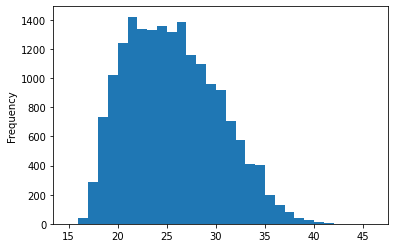

In [ ]:
# quantidades de jogadores por idade
df_fifa.age.plot.hist(bins=range(15, 47, 1))

age,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45
média,1166,2141,2238,2767,4786,6210,8031,8741,10053,11411,13202,13745,14201,14295,13667,16253,14294,13423,10892,7046,5866,7185,5000,4520,9076,2500,1000,1000,8000
qtd não NA,42,289,729,1020,1232,1414,1317,1316,1337,1302,1353,1149,1079,943,903,695,564,399,401,192,127,81,36,25,13,4,1,2,1
qtd NA,0,0,3,4,8,9,23,16,21,17,34,13,22,16,14,12,10,9,3,4,0,1,1,0,0,1,0,0,0
qtd total,42,289,732,1024,1240,1423,1340,1332,1358,1319,1387,1162,1101,959,917,707,574,408,404,196,127,82,37,25,13,5,1,2,1


<br/>

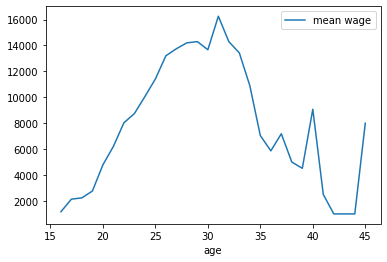

In [ ]:
# médias de salários por idade
df = (
  df_fifa.groupby('age')['wage']
  .agg([  lambda sr: round(sr.mean(), 1),
          'count',
          lambda sr: int(sr.isna().sum()),
          len ]) 
  .set_axis(['média', 'qtd não NA', 'qtd NA', 'qtd total'], axis=1)
 .astype({'média':int, 'qtd NA':int, 'qtd total':int})
)
display(df.T, Markdown('<br/>'))
( df.reset_index()
  .rename(columns={'média':'mean wage'})
  .plot(x='age', y='mean wage') );

### Agregações por clube

In [ ]:
# menores e maiores quantidades de jogadores por clube
# (com filtros booleanos)
sr = df_fifa.groupby('club')['name'].count().rename('qtd').sort_values()
pdod.max_colwidth = None
display(sr[sr <= 20] , 
        sr[sr >= 33].reset_index().groupby('qtd').agg(list))
pdod.max_colwidth = 50

club
Derry City                   18
Sligo Rovers                 19
Limerick FC                  19
Bahia                        20
Botafogo                     20
Tromsø IL                    20
Atlético Mineiro             20
Internacional                20
Grêmio                       20
Ceará Sporting Club          20
Chapecoense                  20
Vitória                      20
Cruzeiro                     20
Sport Club do Recife         20
Paraná                       20
Fluminense                   20
América FC (Minas Gerais)    20
Atlético Paranaense          20
Santos                       20
Name: qtd, dtype: int64

,club
qtd,
33,"[Eintracht Frankfurt, Wolverhampton Wanderers, AS Monaco, Real Madrid, Empoli, CD Leganés, Atlético Madrid, Rayo Vallecano, Chelsea, Tottenham Hotspur, Arsenal, Valencia CF, TSG 1899 Hoffenheim, Manchester United, Newcastle United, Liverpool, Cardiff City, RC Celta, FC Barcelona, Fortuna Düsseldorf, Frosinone, Borussia Dortmund, Southampton, Everton, Manchester City, Burnley]"


In [ ]:
# menores e maiores quantidades de jogadores por clube
# (com filtros por funções, úteis em encadeamento de métodos)
sr = df_fifa.groupby('club')['name'].count().rename('qtd').sort_values()
pdod.max_colwidth = None
display(sr[lambda x: x <= 20] ,  
        sr[lambda x: x >= 33].reset_index().groupby('qtd').agg(list) )
pdod.max_colwidth = 50

club
Derry City                   18
Sligo Rovers                 19
Limerick FC                  19
Bahia                        20
Botafogo                     20
Tromsø IL                    20
Atlético Mineiro             20
Internacional                20
Grêmio                       20
Ceará Sporting Club          20
Chapecoense                  20
Vitória                      20
Cruzeiro                     20
Sport Club do Recife         20
Paraná                       20
Fluminense                   20
América FC (Minas Gerais)    20
Atlético Paranaense          20
Santos                       20
Name: qtd, dtype: int64

,club
qtd,
33,"[Eintracht Frankfurt, Wolverhampton Wanderers, AS Monaco, Real Madrid, Empoli, CD Leganés, Atlético Madrid, Rayo Vallecano, Chelsea, Tottenham Hotspur, Arsenal, Valencia CF, TSG 1899 Hoffenheim, Manchester United, Newcastle United, Liverpool, Cardiff City, RC Celta, FC Barcelona, Fortuna Düsseldorf, Frosinone, Borussia Dortmund, Southampton, Everton, Manchester City, Burnley]"


In [ ]:
# clubes por quantidades de jogadores
pdod.max_colwidth = None
display( 
    df_fifa.groupby('club')['name'].count().rename('qtd').reset_index()
    .groupby('qtd').agg(list) )
pdod.max_colwidth = 50

,club
qtd,
18,[Derry City]
19,"[Limerick FC, Sligo Rovers]"
20,"[América FC (Minas Gerais), Atlético Mineiro, Atlético Paranaense, Bahia, Botafogo, Ceará Sporting Club, Chapecoense, Cruzeiro, Fluminense, Grêmio, Internacional, Paraná, Santos, Sport Club do Recife, Tromsø IL, Vitória]"
21,"[Dalkurd FF, Melbourne Victory, Wellington Phoenix]"
22,"[FK Haugesund, Shamrock Rovers, Östersunds FK]"
23,"[AC Ajaccio, Bray Wanderers, Brisbane Roar, Chicago Fire, Clube Sport Marítimo, Colorado Rapids, Dundalk, FC København, GFC Ajaccio, GIF Sundsvall, IFK Göteborg, Kasimpaşa SK, Odds BK, St. Patrick's Athletic]"
24,"[AS Saint-Étienne, Atalanta, BSC Young Boys, Cagliari, Cheltenham Town, Crawley Town, Crotone, Fiorentina, Forest Green Rovers, IFK Norrköping, IK Start, Inter, Kristiansund BK, LASK Linz, La Berrichonne de Châteauroux, Lillestrøm SK, Newcastle Jets, Os Belenenses, Ranheim Fotball, SG Sonnenhof Großaspach, SV Wehen Wiesbaden, Sandefjord Fotball, Strømsgodset IF, VfR Aalen, Viktoria Plzeň]"
25,"[AC Horsens, Adelaide United, BB Erzurumspor, Benevento, Bohemian FC, CA Osasuna, CD Tondela, Carlisle United, Central Coast Mariners, Clermont Foot 63, Cork City, Cruz Azul, Djurgårdens IF, En Avant de Guingamp, Esbjerg fB, FC Hansa Rostock, FC St. Gallen, FSV Zwickau, GD Chaves, Grimsby Town, Hallescher FC, Hibernian, Hobro IK, Juventus, KRC Genk, Kayserispor, LA Galaxy, LOSC Lille, Los Angeles FC, Luton Town, Melbourne City FC, Moreirense FC, Napoli, Ohod Club, Oldham Athletic, Paris FC, Perth Glory, Randers FC, River Plate, Royal Antwerp FC, SK Sturm Graz, Stade Brestois 29, Sydney FC, US Cremonese, US Orléans Loiret Football, Waterford FC, Western Sydney Wanderers, Wycombe Wanderers, Zagłębie Sosnowiec, Śląsk Wrocław]"
26,"[1. FC Kaiserslautern, 1. FC Magdeburg, AFC Wimbledon, AS Béziers, Akhisar Belediyespor, Bayer 04 Leverkusen, CD Feirense, CD Nacional, CF Rayo Majadahonda, Columbus Crew SC, Córdoba CF, Dijon FCO, Elche CF, Excelsior, FC Groningen, FC Metz, FC Thun, FC Utrecht, Grenoble Foot 38, HJK Helsinki, IF Brommapojkarna, KV Oostende, MSV Duisburg, Macclesfield Town, Molde FK, Monterrey, New York City FC, Newport County, Perugia, Peterborough United, Pogoń Szczecin, Port Vale, Roma, Rosenborg BK, Rotherham United, SC Fortuna Köln, SCR Altach, SV Zulte-Waregem, San Jose Earthquakes, Sanfrecce Hiroshima, Santa Clara, Santos Laguna, Sarpsborg 08 FF, SpVgg Unterhaching, Swindon Town, TSV Hartberg, Tianjin Quanjian FC, Torino, VVV-Venlo, VfL Bochum 1848, VfL Osnabrück, Vålerenga Fotball, Wisła Kraków, Wisła Płock, Wolfsberger AC]"


In [ ]:
# menores e maiores médias de idades de jogadores por clube
sr = df_fifa.groupby('club')['age'].mean()
display(sr.nsmallest(5) , Markdown('<br/>'), sr.nlargest(5))

club
FC Nordsjælland             20.259259
FC Groningen                21.423077
Bohemian FC                 21.480000
FC Sochaux-Montbéliard      21.678571
FC Admira Wacker Mödling    21.925926
Name: age, dtype: float64

<br/>

club
Paraná                 31.6
Cruzeiro               30.6
Atlético Paranaense    30.4
Botafogo               30.4
Chapecoense            30.4
Name: age, dtype: float64

In [ ]:
# maiores e menores médias e somas de salários por clube
df = (
  df_fifa.groupby('club')['wage']
  .agg([  lambda sr: round(sr.mean(), 1),
          'sum',
          'count',
          lambda sr: int(sr.isna().sum()),
          len ]) 
  .set_axis(['média', 'soma', 'qtd não NA', 'qtd NA', 'qtd total'], axis=1)
 .astype({'qtd NA':int, 'qtd total':int})
)
lst_nova_ordem = ['soma', 'média', 'qtd não NA', 'qtd NA', 'qtd total']
pdod.max_colwidth = None
display(
    Markdown('### Maiores médias de salário'), 
      df.nlargest(5, columns='média'), 
    Markdown('<br/><br/>\n\n### Menores médias de salário'), 
      df[df['média'] < 1001].reset_index()
      .groupby('média')['club'].agg(list).to_frame(),
    Markdown('<br/>\n\n---\n<br/><br/>\n### Maiores somas de salário'), 
      df.nlargest(5, columns='soma')[lst_nova_ordem], 
    Markdown('<br/>\n\n### Menores somas de salário'), 
      df.nsmallest(5, columns='soma')[lst_nova_ordem],
       )
pdod.max_colwidth = 50

### Maiores médias de salário

,média,soma,qtd não NA,qtd NA,qtd total
club,,,,,
Real Madrid,152030.3,5017000.0,33,0,33
FC Barcelona,146575.8,4837000.0,33,0,33
Juventus,131680.0,3292000.0,25,0,25
Manchester City,113363.6,3741000.0,33,0,33
Manchester United,102757.6,3391000.0,33,0,33


<br/><br/>

### Menores médias de salário

,club
média,
1000.0,"[AEK Athens, Bohemian FC, Boyacá Chicó FC, Bray Wanderers, Cork City, Deportivo Pasto, Dinamo Zagreb, Dynamo Kyiv, Envigado FC, FC Energie Cottbus, HJK Helsinki, IF Brommapojkarna, IK Sirius, Itagüí Leones FC, Jaguares de Córdoba, Kaizer Chiefs, Limerick FC, Lokomotiv Moscow, Olympiacos CFP, Orlando Pirates, PAOK, PFC CSKA Moscow, Panathinaikos FC, SK Slavia Praha, Shakhtar Donetsk, Shamrock Rovers, Sligo Rovers, Sparta Praha, Spartak Moscow, St. Patrick's Athletic, Trelleborgs FF, Viktoria Plzeň]"


<br/>

---
<br/><br/>
### Maiores somas de salário

,soma,média,qtd não NA,qtd NA,qtd total
club,,,,,
Real Madrid,5017000.0,152030.3,33,0,33
FC Barcelona,4837000.0,146575.8,33,0,33
Manchester City,3741000.0,113363.6,33,0,33
Manchester United,3391000.0,102757.6,33,0,33
Juventus,3292000.0,131680.0,25,0,25


<br/>

### Menores somas de salário

,soma,média,qtd não NA,qtd NA,qtd total
club,,,,,
Derry City,19000.0,1055.6,18,0,18
Limerick FC,19000.0,1000.0,19,0,19
Sligo Rovers,19000.0,1000.0,19,0,19
Dalkurd FF,22000.0,1047.6,21,0,21
Shamrock Rovers,22000.0,1000.0,22,0,22


In [ ]:
# todas agregações por clube

def count_na(sr):
  return int(sr.isna().sum())

dct_agg = dict(
    name=['count'],
    age=['mean', 'count', count_na], 
    wage=['mean', 'sum', 'count', count_na]
)
df_agg_by_club = df_fifa.groupby('club').agg(dct_agg)
df_agg_by_club

name        age                         wage                         
                      count       mean count count_na          mean       sum count count_na
club                                                                                        
 SSV Jahn Regensburg     29  25.655172    29        0   4241.379310  123000.0    29      0.0
1. FC Heidenheim 1846    28  24.000000    28        0   4464.285714  125000.0    28      0.0
1. FC Kaiserslautern     26  23.846154    26        0   1692.307692   44000.0    26      0.0
1. FC Köln               28  24.321429    28        0  13285.714286  372000.0    28      0.0
1. FC Magdeburg          26  24.692308    26        0   4884.615385  127000.0    26      0.0
...                     ...        ...   ...      ...           ...       ...   ...      ...
Zagłębie Sosnowiec       25  26.240000    25        0   1080.000000   27000.0    25      0.0
Çaykur Rizespor          30  25.433333    30        0   6433.333333  193000.0    30      0.0
Örebro SK                27  24.037037    27        0   1481.481481   40000.0    27      0.0
Östersunds FK            22  23.863636    22        0   2045.454545   45000.0    22      0.0
Śląsk Wrocław            25  25.960000    25        0   2040.000000   51000.0    25      0.0

[651 rows x 8 columns]

In [ ]:
# nomes de colunas de `df_agg_by_club` achatados
lst_novos_nomes = [
    '_'.join(tupla) for tupla in df_agg_by_club.columns.to_list()] 
print( df_agg_by_club.columns , '\n' )
df_agg_by_club.columns = lst_novos_nomes
df_agg_by_club

MultiIndex([('name',    'count'),
            ( 'age',     'mean'),
            ( 'age',    'count'),
            ( 'age', 'count_na'),
            ('wage',     'mean'),
            ('wage',      'sum'),
            ('wage',    'count'),
            ('wage', 'count_na')],
           ) 



,name_count,age_mean,age_count,age_count_na,wage_mean,wage_sum,wage_count,wage_count_na
club,,,,,,,,
SSV Jahn Regensburg,29,25.655172,29,0,4241.379310,123000.0,29,0.0
1. FC Heidenheim 1846,28,24.000000,28,0,4464.285714,125000.0,28,0.0
1. FC Kaiserslautern,26,23.846154,26,0,1692.307692,44000.0,26,0.0
1. FC Köln,28,24.321429,28,0,13285.714286,372000.0,28,0.0
1. FC Magdeburg,26,24.692308,26,0,4884.615385,127000.0,26,0.0
...,...,...,...,...,...,...,...,...
Zagłębie Sosnowiec,25,26.240000,25,0,1080.000000,27000.0,25,0.0
Çaykur Rizespor,30,25.433333,30,0,6433.333333,193000.0,30,0.0
Örebro SK,27,24.037037,27,0,1481.481481,40000.0,27,0.0


### Rankings

In [ ]:
# melhores clubes por potential e overall
qtd = 5
df = df_fifa.groupby('club')[['potential', 'overall']].mean()
display(
    df.nlargest(qtd, columns='potential')
    .reset_index().set_index(pd.RangeIndex(1,qtd+1))  ,

    Markdown('<br/>')  ,

    df.nlargest(qtd, columns='overall').sort_index(axis=1)
    .reset_index().set_index(pd.RangeIndex(1,qtd+1))  
)

,club,potential,overall
1,Juventus,85.520000,82.280000
2,FC Barcelona,85.303030,78.030303
3,Real Madrid,84.636364,78.242424
4,Manchester City,83.909091,76.727273
5,FC Bayern München,83.655172,77.000000


<br/>

,club,overall,potential
1,Juventus,82.280000,85.520000
2,Napoli,80.000000,83.440000
3,Inter,79.750000,81.750000
4,Real Madrid,78.242424,84.636364
5,Milan,78.074074,82.555556


In [ ]:
# melhores goleiros por potential e overall
qtd = 5
df = df_fifa.loc[df_fifa.position == 'GK', :'wage'].copy()
display(
    df.nlargest(qtd, columns='potential')
    .set_index(pd.RangeIndex(1,qtd+1))
    [['potential'] + [col for col in df.columns if col != 'potential']]  ,

    Markdown('<br/>')  ,

    df.nlargest(qtd, columns='overall')
    .set_index(pd.RangeIndex(1,qtd+1))
    [['overall'] + [col for col in df.columns if col != 'overall']]
)

,potential,name,age,nationality,overall,club,value,wage
1,93,De Gea,27,Spain,91,Manchester United,72000000.0,260000.0
2,93,J. Oblak,25,Slovenia,90,Atlético Madrid,68000000.0,94000.0
3,93,G. Donnarumma,19,Italy,82,Milan,29000000.0,23000.0
4,92,M. ter Stegen,26,Germany,89,FC Barcelona,58000000.0,240000.0
5,91,Kepa,23,Spain,83,Chelsea,28500000.0,84000.0


<br/>

,overall,name,age,nationality,potential,club,value,wage
1,91,De Gea,27,Spain,93,Manchester United,72000000.0,260000.0
2,90,J. Oblak,25,Slovenia,93,Atlético Madrid,68000000.0,94000.0
3,89,M. ter Stegen,26,Germany,92,FC Barcelona,58000000.0,240000.0
4,89,T. Courtois,26,Belgium,90,Real Madrid,53500000.0,240000.0
5,89,M. Neuer,32,Germany,89,FC Bayern München,38000000.0,130000.0


In [ ]:
# jogadores mais rápidos
qtd = 5
df = pd.concat([df_fifa[['sprint_speed']], df_fifa.loc[:, :'wage'].copy()],
               axis=1)
display(
    df.nlargest(qtd, columns='sprint_speed')
    .set_index(pd.RangeIndex(1,qtd+1))
)

,sprint_speed,name,age,nationality,overall,potential,club,value,wage
1,96.0,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0
2,96.0,L. Sané,22,Germany,86,92,Manchester City,61000000.0,195000.0
3,96.0,Adama,22,Spain,75,85,Wolverhampton Wanderers,10500000.0,54000.0
4,95.0,P. Aubameyang,29,Gabon,88,88,Arsenal,59000000.0,265000.0
5,95.0,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0


In [ ]:
# jogadores com chute mais forte
qtd = 5
df = pd.concat([df_fifa[['shot_power']], df_fifa.loc[:, :'wage'].copy()],
               axis=1)
display(
    df.nlargest(qtd, columns='shot_power')
    .set_index(pd.RangeIndex(1,qtd+1))
)

,shot_power,name,age,nationality,overall,potential,club,value,wage
1,95.0,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0
2,94.0,Hulk,31,Brazil,81,81,Shanghai SIPG FC,15500000.0,25000.0
3,93.0,F. Guarín,32,Colombia,76,76,Shanghai Greenland Shenhua FC,6000000.0,16000.0
4,92.0,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0
5,92.0,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0


### Outliers

In [ ]:
def lims_outliers(sr):
  q1, q3 = sr.quantile([0.25, 0.75])
  iqr = q3 - q1
  return (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

##### Salários

In [ ]:
# sumário de salários
df_fifa.wage.describe()

count     17966.000000
mean       9861.850161
std       22117.273534
min        1000.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: wage, dtype: float64

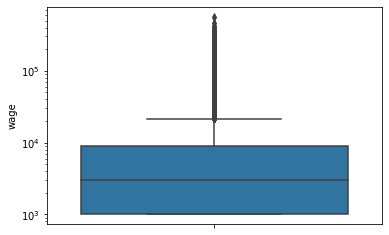

In [ ]:
sns.boxplot(data=df_fifa, y='wage').set_yscale('log')

In [ ]:
wage_lim_inf, wage_lim_sup = lims_outliers(df_fifa.wage)
wage_lim_inf, wage_lim_sup

(-11000.0, 21000.0)

In [ ]:
sr_wage_sup = df_fifa.wage[lambda x: x > wage_lim_sup]
sr_wage_sup.describe()

count      2031.000000
mean      51529.788282
std       46878.660831
min       22000.000000
25%       27000.000000
50%       36000.000000
75%       54000.000000
max      565000.000000
Name: wage, dtype: float64

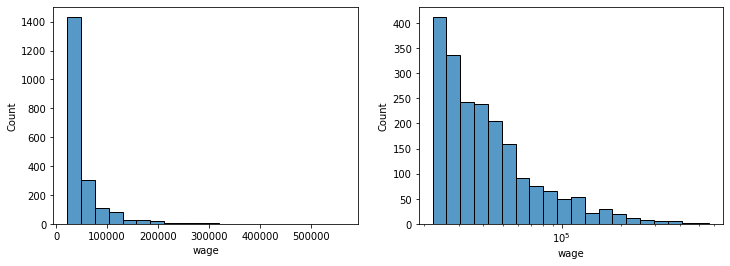

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(*(fig.get_size_inches() * (2, 1)))
sns.histplot(sr_wage_sup, bins=20, ax=ax1)
sns.histplot(sr_wage_sup, bins=20, ax=ax2, log_scale=True);

##### Shot power

In [ ]:
# sumário de shot power
df_fifa.shot_power.describe()

count    18159.000000
mean        55.460047
std         17.237958
min          2.000000
25%         45.000000
50%         59.000000
75%         68.000000
max         95.000000
Name: shot_power, dtype: float64

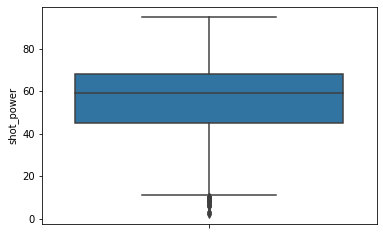

In [ ]:
sns.boxplot(data=df_fifa, y='shot_power');

In [ ]:
shtpwr_lim_inf, shtpwr_lim_sup = lims_outliers(df_fifa.shot_power)
shtpwr_lim_inf, shtpwr_lim_sup

(10.5, 102.5)

In [ ]:
sr_shtpwr_inf = df_fifa.shot_power[lambda x: x < shtpwr_lim_inf]
sr_shtpwr_inf.describe()

count    15.000000
mean      7.733333
std       2.520393
min       2.000000
25%       6.500000
50%       9.000000
75%       9.500000
max      10.000000
Name: shot_power, dtype: float64

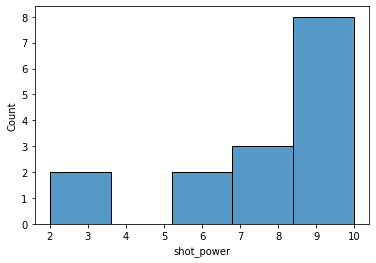

In [ ]:
sns.histplot(sr_shtpwr_inf)